In [1]:
##############################################CAB FARE PREDICTION ##################################################

In [2]:
#Import the library
import pandas as pd
import os
import numpy as np
from ggplot import *
import seaborn as sns

In [3]:
#set the Working Directory
os.chdir("C:\\Users\shrid\Downloads\edWisor\Project 2")

In [4]:
os.getcwd()

'C:\\Users\\shrid\\Downloads\\edWisor\\Project 2'

In [5]:
#Load the data
train = pd.read_csv("train_cab.csv")

In [6]:
#Have a glimpse of the data
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [7]:
train.shape

(16067, 7)

In [8]:
#Data type check
train.dtypes

fare_amount           object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [9]:
#Summary of the data
train.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,10.578384,6.826587,10.575062,6.187087,60.844122
min,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,-73.966838,40.767381,-73.963643,40.768013,2.000000
max,40.766125,401.083332,40.802437,41.366138,5345.000000


In [10]:
# Let's convert fare_amount to numeric
train['fare_amount'] = pd.to_numeric(train['fare_amount'], errors = 'coerce')

In [11]:
train['fare_amount'].dtypes

dtype('float64')

In [12]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16042.000000,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,15.015004,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,430.460945,10.578384,6.826587,10.575062,6.187087,60.844122
min,-3.000000,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,6.000000,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,8.500000,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,12.500000,-73.966838,40.767381,-73.963643,40.768013,2.000000
max,54343.000000,40.766125,401.083332,40.802437,41.366138,5345.000000


In [13]:
#train['pickup_datetime'] =  pd.to_datetime(train['pickup_datetime'], format='%Y-%m-%d %H:%M:%S UTC')
#Getting Error because of some value, let's make it NA and drop

In [14]:
train.loc[train['pickup_datetime'] == '43' ,'pickup_datetime'] = np.nan  
train = train.drop(train[train['pickup_datetime'].isnull()].index, axis = 0)


In [15]:
train['pickup_datetime'] =  pd.to_datetime(train['pickup_datetime'], format='%Y-%m-%d %H:%M:%S UTC')

In [16]:
#Checking for data types and top 5 rows
train.dtypes
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0


In [17]:
#Let's check for Missing values
train.isnull().sum()

fare_amount          25
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count      55
dtype: int64

In [18]:
#Let's remove Missing values
train = train.drop(train[train['fare_amount'].isnull()].index,axis=0)
train = train.drop(train[train['passenger_count'].isnull()].index,axis=0)

In [19]:
#Let's check if there are any missing values after removal
train.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [20]:
train.shape

(15986, 7)

In [21]:
#Feature Engineering

In [22]:
#Let's extract Date, year, month, day, hour out of the timestamp
train['year'] = train['pickup_datetime'].dt.year

train['month'] = train['pickup_datetime'].dt.month

train['date'] = train['pickup_datetime'].dt.day

train['day'] = train['pickup_datetime'].dt.dayofweek

train['hour'] = train['pickup_datetime'].dt.hour

In [23]:
#Let's have a glimpse of the data after extracting new variables
train.shape
train.head()


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,date,day,hour
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009,6,15,0,17
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,2010,1,5,1,16
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011,8,18,3,0
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012,4,21,5,4
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010,3,9,1,7


In [24]:
#Let's drop the pickup_datetime variable 
train = train.drop('pickup_datetime',axis=1)

In [25]:
train.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,date,day,hour
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1.0,2009,6,15,0,17
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1.0,2010,1,5,1,16
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2.0,2011,8,18,3,0
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1.0,2012,4,21,5,4
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1.0,2010,3,9,1,7


In [26]:
#Outlier analysis

cnames =['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count']

fare_amount


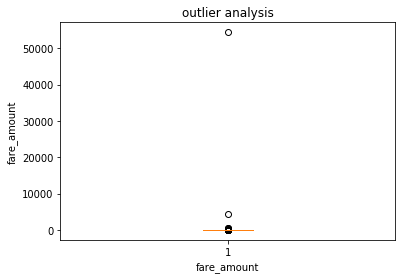

pickup_longitude


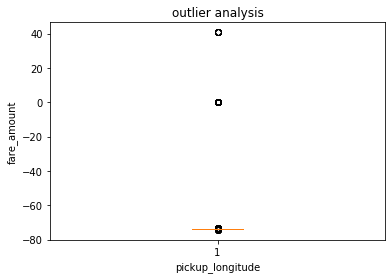

pickup_latitude


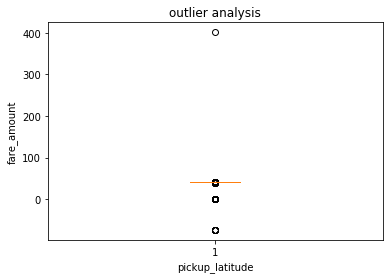

dropoff_longitude


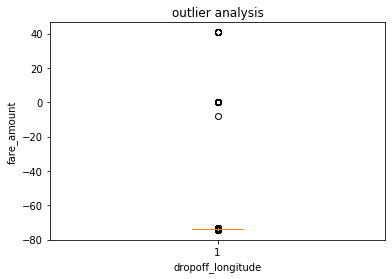

dropoff_latitude


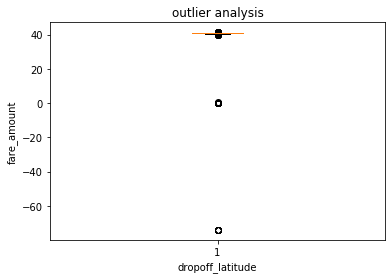

passenger_count


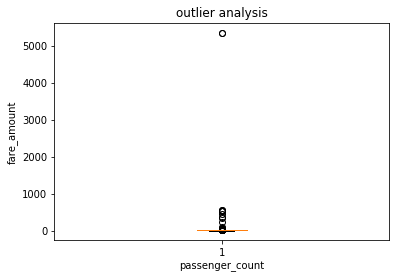

In [27]:
import matplotlib.pyplot as plt

%matplotlib inline

for i in cnames:
    print(i)
    plt.boxplot(train[i])
    plt.xlabel(i)
    plt.ylabel('fare_amount')
    plt.title('outlier analysis')
    plt.show()

In [28]:
#Let's treat outliers

#Fare Amount

# Quartiles
Q1,Q3 = np.percentile(train['fare_amount'],[25,75])

#IQR
IQR = Q3-Q1

# Lower and upper limits 
LL = Q1 - (1.5 * IQR)
UL = Q3 + (1.5 * IQR)

# Capping with ul for maxmimum values 
train.loc[train['fare_amount'] < LL ,'fare_amount'] = LL  
train.loc[train['fare_amount'] > UL ,'fare_amount'] = UL

In [29]:
#Less than 0 and 0.01 values
train.loc[train.fare_amount <= 0,'fare_amount'] = np.nan
train.loc[train.fare_amount == 0.01,'fare_amount'] = np.nan

train = train.drop(train[train['fare_amount'].isnull()].index, axis = 0)

In [30]:
train['fare_amount'].describe()

count    15981.000000
mean        10.065562
std          5.459774
min          1.140000
25%          6.000000
50%          8.500000
75%         12.500000
max         22.250000
Name: fare_amount, dtype: float64

In [31]:
#Pick up Longitude
train['pickup_longitude'].describe()

count    15981.000000
mean       -72.463889
std         10.575215
min        -74.438233
25%        -73.992142
50%        -73.981689
75%        -73.966824
max         40.766125
Name: pickup_longitude, dtype: float64

In [32]:
# Quartiles
Q1,Q3 = np.percentile(train['pickup_longitude'],[25,75])

#IQR
IQR = Q3-Q1

# Lower and upper limits 
LL = Q1 - (1.5 * IQR)
UL = Q3 + (1.5 * IQR)

# Max of this variable is 40.77 which we can consider as outlier and capping with UL

train.loc[train['pickup_longitude'] < LL ,'pickup_longitude'] = LL  
train.loc[train['pickup_longitude'] > UL ,'pickup_longitude'] = UL

In [33]:
#Pick up Latitude
train['pickup_latitude'].describe()

count    15981.000000
mean        39.915328
std          6.830082
min        -74.006893
25%         40.734938
50%         40.752615
75%         40.767363
max        401.083332
Name: pickup_latitude, dtype: float64

In [34]:
# Quartiles
Q1,Q3 = np.percentile(train['pickup_latitude'],[25,75])

#IQR
IQR = Q3-Q1

# Lower and upper limits 
LL = Q1 - (1.5 * IQR)
UL = Q3 + (1.5 * IQR)

# Capping with ul for maxmimu values 
train.loc[train['pickup_latitude'] < LL ,'pickup_latitude'] = LL  
train.loc[train['pickup_latitude'] > UL ,'pickup_latitude'] = UL

In [35]:
train['pickup_latitude'].describe()

count    15981.000000
mean        40.750294
std          0.025829
min         40.686300
25%         40.734938
50%         40.752615
75%         40.767363
max         40.816001
Name: pickup_latitude, dtype: float64

In [36]:
#Drop off Longitude
train['dropoff_longitude'].describe()

count    15981.000000
mean       -72.463445
std         10.571877
min        -74.429332
25%        -73.991182
50%        -73.980167
75%        -73.963646
max         40.802437
Name: dropoff_longitude, dtype: float64

In [37]:
# Quartiles
Q1,Q3 = np.percentile(train['dropoff_longitude'],[25,75])

#IQR
IQR = Q3-Q1

# Lower and upper limits 
LL = Q1 - (1.5 * IQR)
UL = Q3 + (1.5 * IQR)

# Capping with ul for maxmimu values 

train.loc[train['dropoff_longitude'] < LL,'dropoff_longitude'] = LL
train.loc[train['dropoff_longitude'] > UL,'dropoff_longitude'] = UL

In [38]:
#Drop off Latitude
train['dropoff_latitude'].describe()

count    15981.000000
mean        39.898418
std          6.187326
min        -74.006377
25%         40.734663
50%         40.753563
75%         40.768011
max         41.366138
Name: dropoff_latitude, dtype: float64

In [39]:
# Quartiles
Q1,Q3 = np.percentile(train['dropoff_latitude'],[25,75])

#IQR
IQR = Q3-Q1

# Lower and upper limits 
LL = Q1 - (1.5 * IQR)
UL = Q3 + (1.5 * IQR)

# Capping with ul for maxmimu values 

train.loc[train['dropoff_latitude'] < LL ,'dropoff_latitude'] = LL  
train.loc[train['dropoff_latitude'] > UL ,'dropoff_latitude'] = UL

In [40]:
train['dropoff_latitude'].describe()

count    15981.000000
mean        40.750575
std          0.028225
min         40.684641
25%         40.734663
50%         40.753563
75%         40.768011
max         40.818033
Name: dropoff_latitude, dtype: float64

In [41]:
#Passenger Count
train['passenger_count'].describe()

count    15981.000000
mean         2.623592
std         60.901659
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max       5345.000000
Name: passenger_count, dtype: float64

In [42]:
# Quartiles
Q1,Q3 = np.percentile(train['passenger_count'],[25,75])

#IQR
IQR = Q3-Q1

# Lower and upper limits 
LL = round(Q1 - (1.5 * IQR))
UL = round(Q3 + (1.5 * IQR))

# Capping with UL for maxmimum values 
train.loc[train['passenger_count'] < LL ,'passenger_count'] = LL  
train.loc[train['passenger_count'] > 6 ,'passenger_count'] = UL

train.loc[train['passenger_count'] < 1 ,'passenger_count'] = np.nan

train = train.drop(train[train['passenger_count'].isnull()].index, axis = 0)

In [43]:
train['passenger_count'].describe()

count    15923.000000
mean         1.652408
std          1.267626
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: passenger_count, dtype: float64

fare_amount


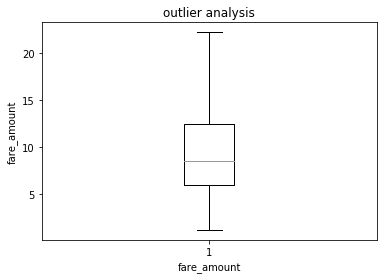

pickup_longitude


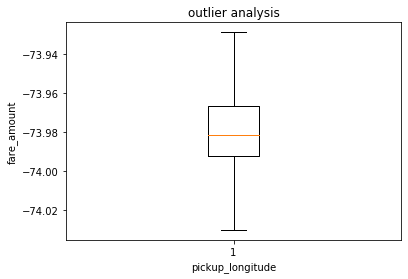

pickup_latitude


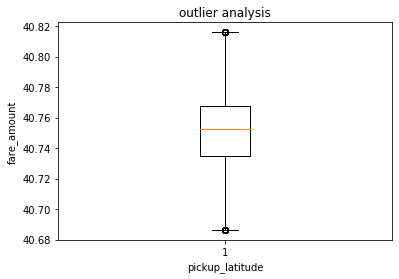

dropoff_longitude


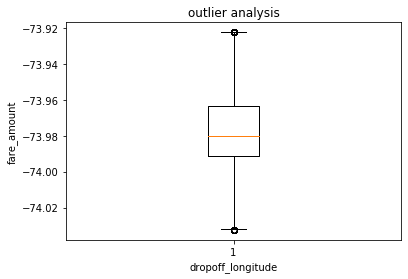

dropoff_latitude


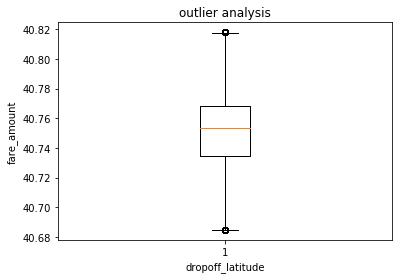

passenger_count


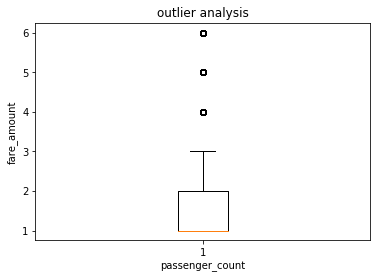

In [44]:
#Boxplot after removal of Outliers
import matplotlib.pyplot as plt

%matplotlib inline

for i in cnames:
    print(i)
    plt.boxplot(train[i])
    plt.xlabel(i)
    plt.ylabel('fare_amount')
    plt.title('outlier analysis')
    plt.show()

In [45]:
train.head()
train.shape

(15923, 11)

In [46]:
#Let's calculate distance between two geo codes using haversine formula
from math import radians, cos, sin, asin, sqrt

def distance1(lat1, long1, lat2, long2):
    
    R_earth = 6371 # earth radius (km)
    
    #Convert degrees to radians
    lat1, long1, lat2, long2 = map(np.radians, [lat1, long1, lat2, long2])
    
    #Compute distances along lat, lon dimensions
    dlat = lat2 - lat1
    dlon = long2 - long1
    
    #Compute haversine distance
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    
    return 2 * R_earth * np.arcsin(np.sqrt(a))

In [47]:
#Let's calculate distance using above function
train['distance'] = distance1(train['pickup_latitude'],train['pickup_longitude'],train['dropoff_latitude'] ,train['dropoff_longitude'])

In [48]:
train.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,date,day,hour,distance
0,4.5,-73.928847,40.721319,-73.922342,40.712278,1.0,2009,6,15,0,17,1.145091
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1.0,2010,1,5,1,16,8.450134
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2.0,2011,8,18,3,0,1.389525
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1.0,2012,4,21,5,4,2.799270
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1.0,2010,3,9,1,7,1.999157


In [49]:
train.shape

(15923, 12)

In [50]:
train.dtypes

fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
year                   int64
month                  int64
date                   int64
day                    int64
hour                   int64
distance             float64
dtype: object

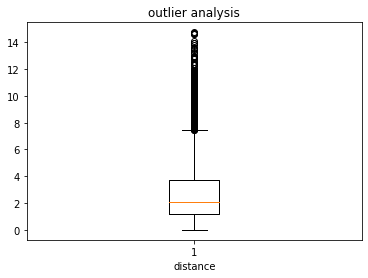

In [51]:
#Outlier for distance
%matplotlib inline
plt.boxplot(train['distance'])
plt.xlabel('distance')
plt.title('outlier analysis')
plt.show()


In [52]:
train['distance'].describe()

count    15923.000000
mean         2.788402
std          2.239064
min          0.000000
25%          1.200397
50%          2.094753
75%          3.710926
max         14.745183
Name: distance, dtype: float64

In [53]:
#Let's replace less than 1 values with mean
train.loc[train.distance < 1,'distance'] = train['distance'].mean()

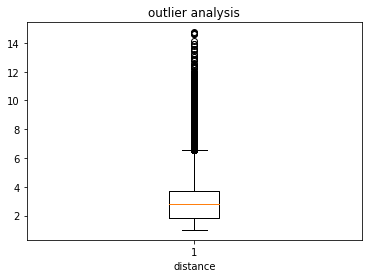

In [54]:
#Boxplot after removing outliers

%matplotlib inline
plt.boxplot(train['distance'])
plt.xlabel('distance')
plt.title('outlier analysis')
plt.show()


In [55]:
train.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,date,day,hour,distance
0,4.5,-73.928847,40.721319,-73.922342,40.712278,1.0,2009,6,15,0,17,1.145091
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1.0,2010,1,5,1,16,8.450134
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2.0,2011,8,18,3,0,1.389525
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1.0,2012,4,21,5,4,2.799270
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1.0,2010,3,9,1,7,1.999157


In [56]:
train.shape

(15923, 12)

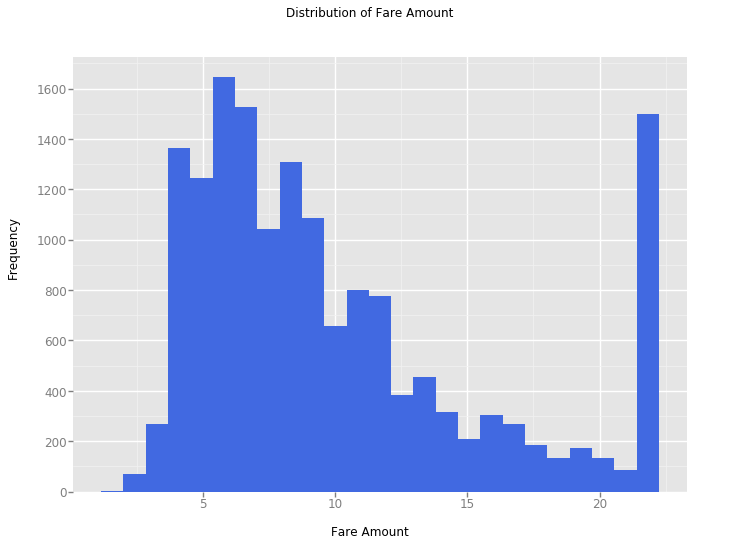

<ggplot: (-9223371886590092700)>

In [57]:
#Exploratory Data Analysis

#Continous variables analysis

#Fare amount
a1 = ggplot(train, aes( x = 'fare_amount')) + geom_histogram(fill = "royalblue", bins = 25) +\
  labs(x = "Fare Amount", y = "Frequency") + ggtitle("Distribution of Fare Amount")
a1



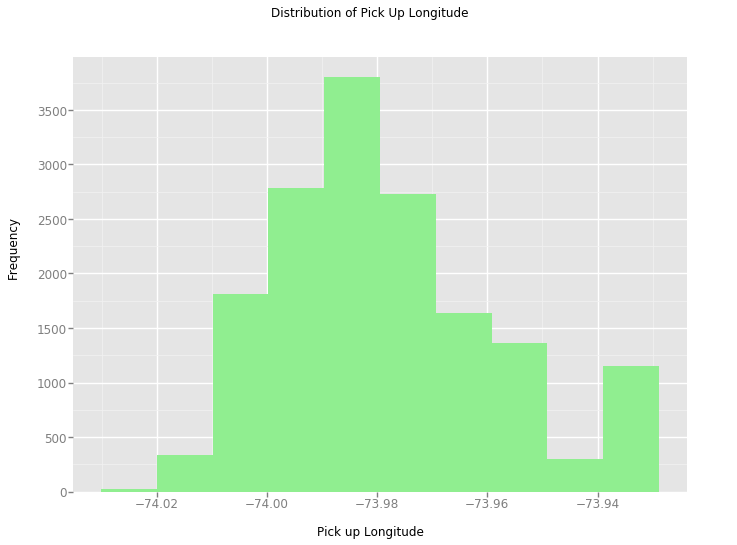

<ggplot: (-9223371886590086128)>

In [58]:
#Pickup Longitude
a2 = ggplot(train, aes( x = 'pickup_longitude')) + geom_histogram( fill = "lightgreen") +\
  labs(x = "Pick up Longitude", y = "Frequency") + ggtitle("Distribution of Pick Up Longitude")
a2


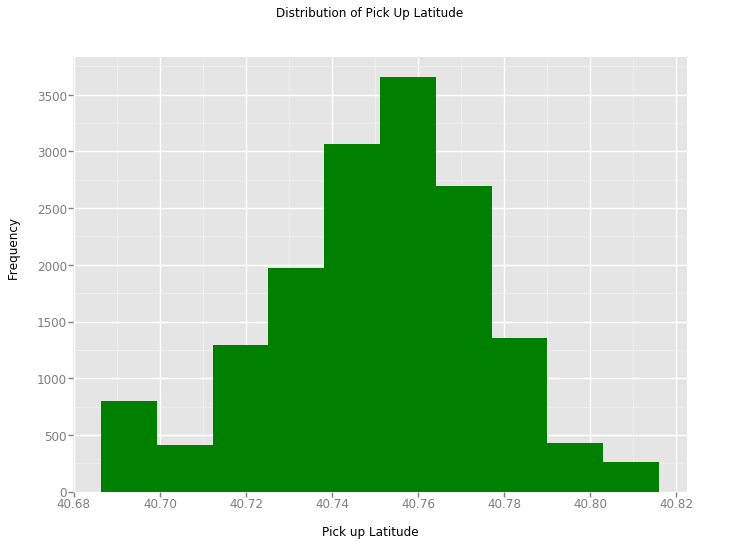

<ggplot: (-9223371886590147640)>

In [59]:
#Pickup Latitude
a3 = ggplot(train, aes( x = 'pickup_latitude')) + geom_histogram(fill = "green") +\
  labs(x = "Pick up Latitude", y = "Frequency") + ggtitle("Distribution of Pick Up Latitude")
a3

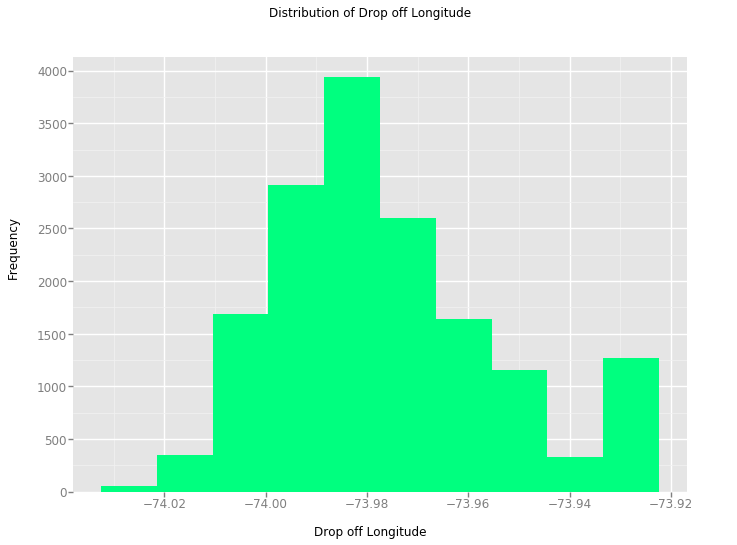

<ggplot: (-9223371886590888716)>

In [60]:
#Drop off Longitude
a4 = ggplot(train, aes( x = 'dropoff_longitude')) + geom_histogram( fill = "springgreen") +\
  labs(x = "Drop off Longitude", y = "Frequency") + ggtitle("Distribution of Drop off Longitude")
a4

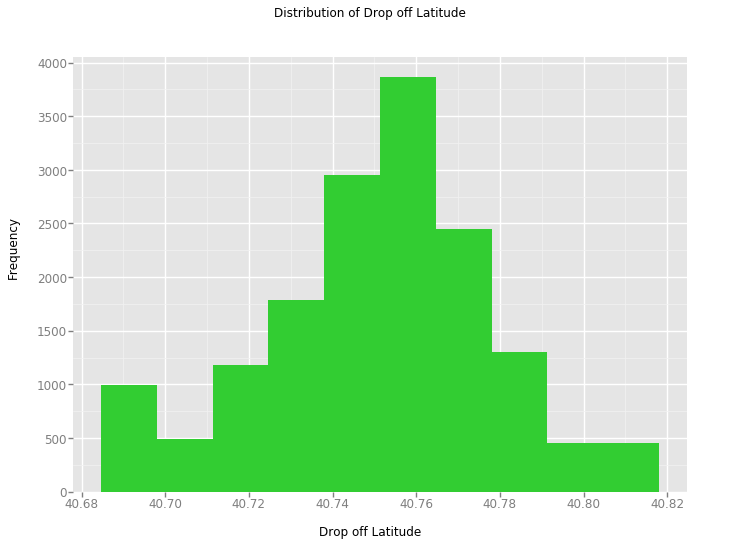

<ggplot: (-9223371886590969684)>

In [61]:
#Drop off Latitude
a5 = ggplot(train, aes( x = 'dropoff_latitude')) + geom_histogram( fill = "limegreen") +\
  labs(x = "Drop off Latitude", y = "Frequency") + ggtitle("Distribution of Drop off Latitude")
a5

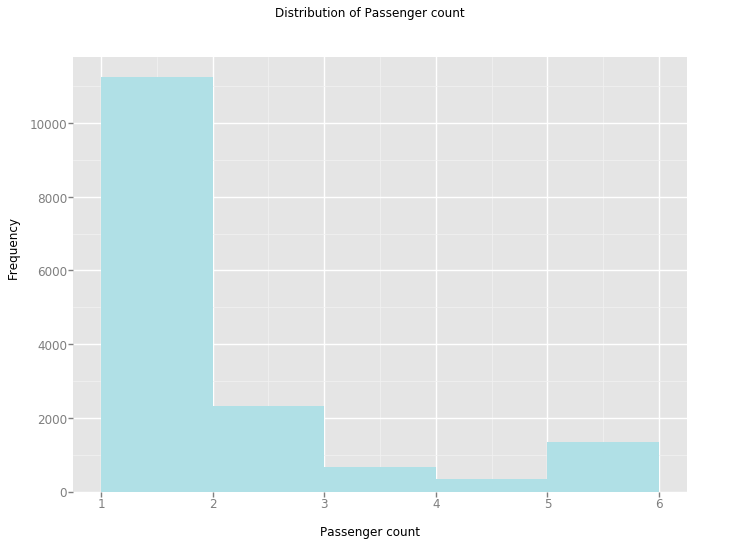

<ggplot: (-9223371886590096668)>

In [62]:
#Passenger Count
a6 = ggplot(train, aes( x = 'passenger_count')) + geom_histogram(binwidth = 1, fill = "powderblue") + \
  labs(x = "Passenger count", y = "Frequency") + ggtitle("Distribution of Passenger count")
a6

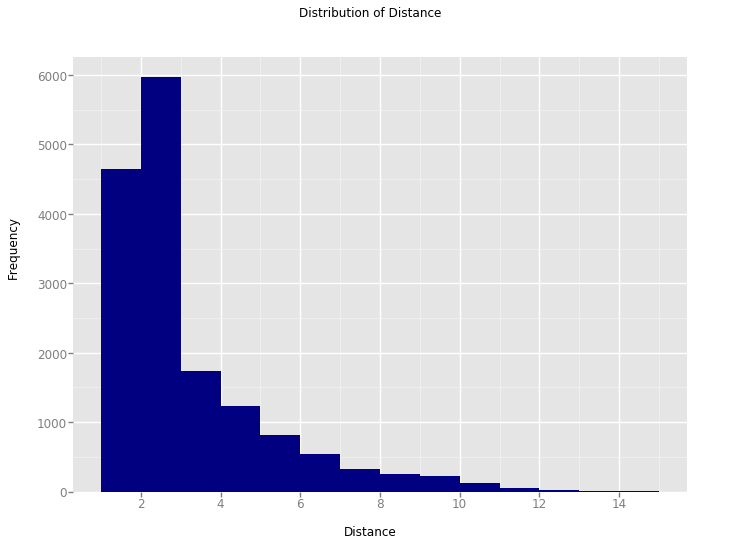

<ggplot: (-9223371886591017824)>

In [63]:
#Distance
a7 = ggplot(train, aes( x = 'distance')) + geom_histogram(binwidth = 1, fill = "navy") +\
  labs(x = "Distance", y = "Frequency") + ggtitle("Distribution of Distance")
a7

In [64]:
#Distance is right skewed, let's remove skewness using log transformation
train['distance'] = np.log(train['distance'])

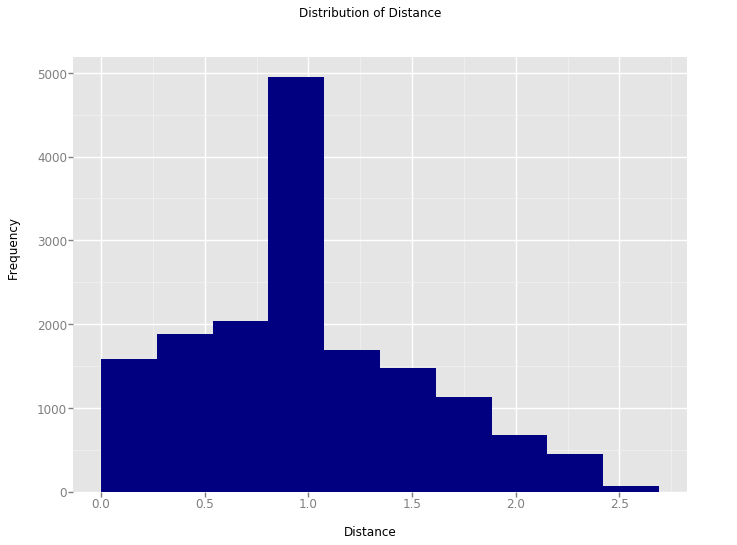

<ggplot: (-9223371886590191780)>

In [65]:
#Let's check distribution after transformation
a7 = ggplot(train, aes( x = 'distance')) + geom_histogram( fill = "navy") +\
  labs(x = "Distance", y = "Frequency") + ggtitle("Distribution of Distance")
a7

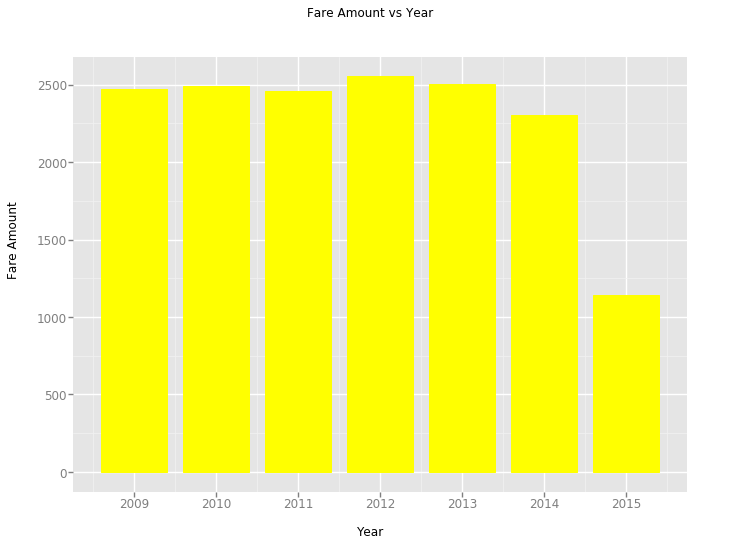

<ggplot: (-9223371886589156400)>

In [66]:
#Categorical Variables

#Fare amount vs Year
b1 = ggplot(train, aes('year', 'fare_amount')) + geom_bar(stat = "identity", fill = "yellow") + \
  labs( x = "Year", y = "Fare Amount") + ggtitle("Fare Amount vs Year")
b1

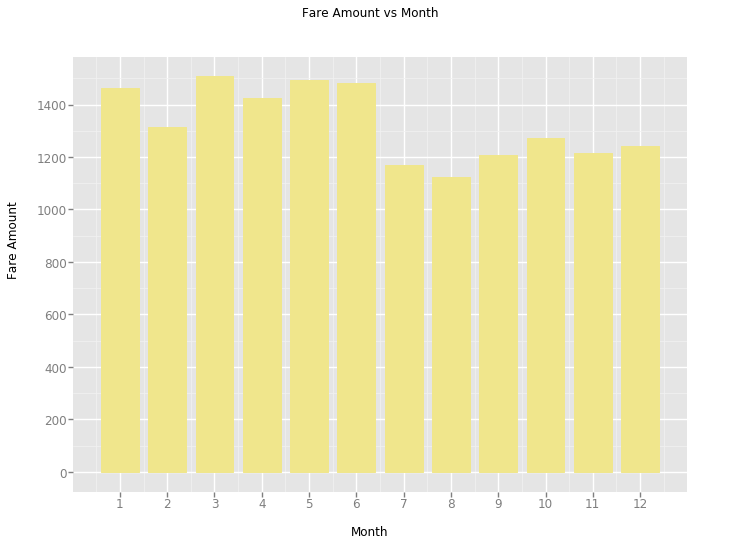

<ggplot: (-9223371886589989932)>

In [67]:
#Fare amount vs Month
b2 = ggplot(train, aes('month', 'fare_amount')) + geom_bar(stat = "identity", fill = "khaki") +\
  labs( x = "Month", y = "Fare Amount") + ggtitle("Fare Amount vs Month")
b2

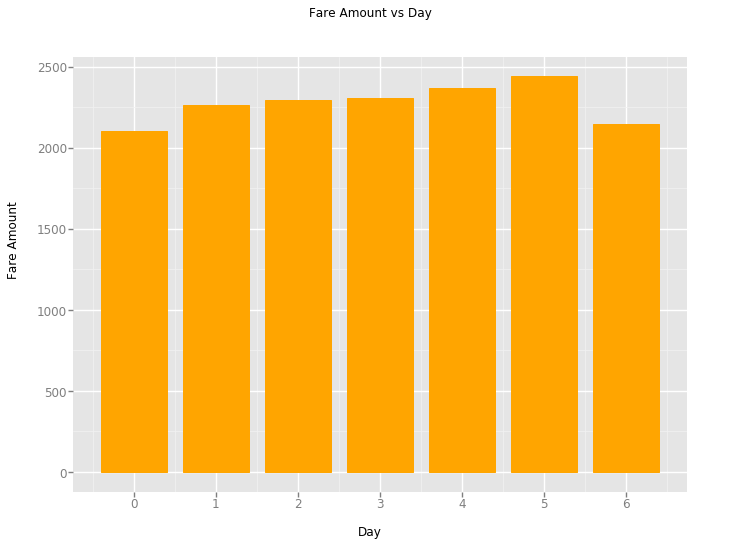

<ggplot: (-9223371886589938608)>

In [68]:
#Fare amount vs Day
b3 = ggplot(train, aes('day', 'fare_amount')) + geom_bar(stat = "identity", fill = "orange") +\
  labs( x = "Day", y = "Fare Amount") + ggtitle("Fare Amount vs Day")
b3

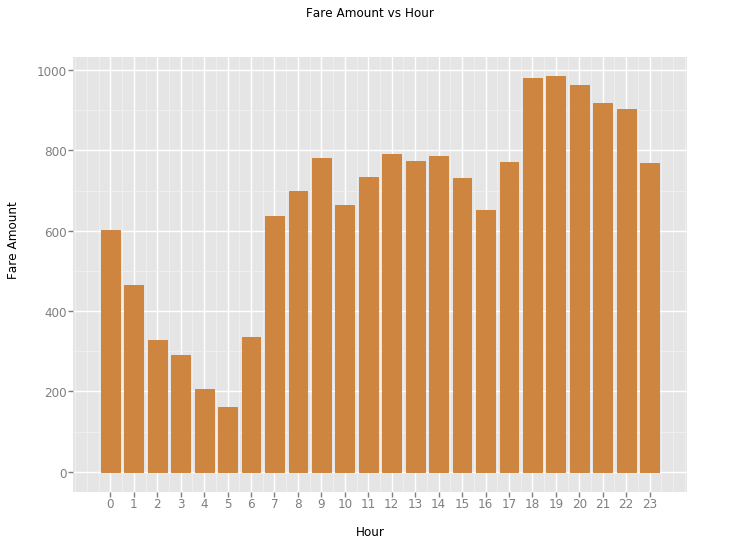

<ggplot: (-9223371886589026000)>

In [69]:
#Fare amount vs Hour
b4 = ggplot(train, aes('hour', 'fare_amount')) + geom_bar(stat = "identity", fill = "peru") +\
  labs( x = "Hour", y = "Fare Amount") + ggtitle("Fare Amount vs Hour")
b4


In [70]:
#Correlation plot
cnames = ['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count','distance']

df_corr = train.loc[:,cnames]

In [71]:
c1 = df_corr.corr()
print(c1)

                   fare_amount  pickup_longitude  pickup_latitude  \
fare_amount           1.000000          0.146620        -0.112741   
pickup_longitude      0.146620          1.000000         0.260565   
pickup_latitude      -0.112741          0.260565         1.000000   
dropoff_longitude     0.234238          0.422544         0.040175   
dropoff_latitude     -0.104740          0.073255         0.513602   
passenger_count       0.014887         -0.005155        -0.002746   
distance              0.709523          0.095626        -0.111398   

                   dropoff_longitude  dropoff_latitude  passenger_count  \
fare_amount                 0.234238         -0.104740         0.014887   
pickup_longitude            0.422544          0.073255        -0.005155   
pickup_latitude             0.040175          0.513602        -0.002746   
dropoff_longitude           1.000000          0.251747        -0.008292   
dropoff_latitude            0.251747          1.000000        -0.002314 

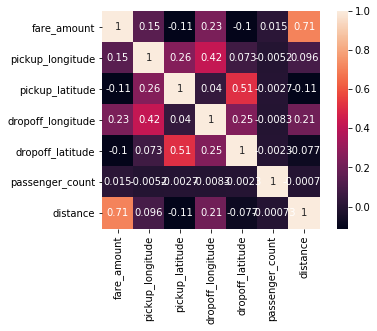

In [72]:
sns.heatmap(c1,square=True,annot=True)

In [73]:
#Anova test for categorical variables
cat = ['year','month', 'date', 'day', 'hour']

import statsmodels.api as sm

from statsmodels.formula.api import ols

for i in cat:
    mod = ols('fare_amount' + '~' + i, data = train).fit()
    aov_table = sm.stats.anova_lm(mod, typ = 2)
    print(aov_table)

                 sum_sq       df           F        PR(>F)
year        9894.401185      1.0  338.750358  7.132035e-75
Residual  465029.062316  15921.0         NaN           NaN
                 sum_sq       df          F    PR(>F)
month        657.118573      1.0  22.059303  0.000003
Residual  474266.344928  15921.0        NaN       NaN
                 sum_sq       df         F    PR(>F)
date          30.160919      1.0  1.011158  0.314641
Residual  474893.302582  15921.0       NaN       NaN
                 sum_sq       df        F    PR(>F)
day          142.420589      1.0  4.77584  0.028876
Residual  474781.042913  15921.0      NaN       NaN
                 sum_sq       df          F    PR(>F)
hour         565.193434      1.0  18.969722  0.000013
Residual  474358.270068  15921.0        NaN       NaN


In [74]:
#p > 0.05 for day and date. So let's remove those variables
DropVar = ['date', 'day']

train = train.drop(DropVar , axis = 1)

In [75]:
train.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,hour,distance
0,4.5,-73.928847,40.721319,-73.922342,40.712278,1.0,2009,6,17,0.135484
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1.0,2010,1,16,2.134182
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2.0,2011,8,0,0.328962
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1.0,2012,4,4,1.029359
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1.0,2010,3,7,0.692725


In [76]:
#Let's create Train and Test dataset
from sklearn.model_selection import train_test_split

train_data,test_data = train_test_split(train, test_size = 0.2, random_state = 123)

In [77]:
train_data.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,hour,distance
14164,6.5,-73.963750,40.756978,-73.967952,40.768841,1.0,2014,6,10,0.311706
15015,6.5,-74.005822,40.741198,-73.992935,40.763123,1.0,2010,2,1,0.981592
15834,9.0,-73.982410,40.770787,-73.968917,40.797687,1.0,2013,9,19,1.163029
8030,6.5,-73.975204,40.787300,-73.962502,40.804726,1.0,2015,6,8,0.794400
7381,5.7,-73.979195,40.785122,-73.967842,40.801792,2.0,2010,1,17,0.735008


In [78]:
test_data.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,hour,distance
14917,5.7,-73.979652,40.762132,-73.973703,40.767512,1.0,2011,10,17,1.025469
6606,7.0,-73.973305,40.748030,-73.991763,40.749095,1.0,2013,5,9,0.444295
12462,12.5,-73.964927,40.806871,-73.980483,40.775220,1.0,2014,11,19,1.323137
10910,7.3,-73.993872,40.751731,-73.971415,40.749506,1.0,2012,8,19,0.645957
357,8.5,-73.928847,40.686300,-73.922342,40.684641,1.0,2013,7,16,1.025469


In [79]:
#Linear regression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [80]:
#Let's train the model
model1 = sm.OLS(train_data.iloc[:,0].astype(float), train_data.iloc[:,1:10].astype(float)).fit()

In [81]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            fare_amount   R-squared (uncentered):                   0.894
Model:                            OLS   Adj. R-squared (uncentered):              0.894
Method:                 Least Squares   F-statistic:                          1.193e+04
Date:                Wed, 25 Sep 2019   Prob (F-statistic):                        0.00
Time:                        19:38:30   Log-Likelihood:                         -34824.
No. Observations:               12738   AIC:                                  6.967e+04
Df Residuals:                   12729   BIC:                                  6.973e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
pickup_longitude     -1.3111      1.580     -0.830      0.407      -4.408       1.786
pickup_latitude       4.1706      1.522      2.741      0.006       1.188       7.153
dropoff_longitude    10.8572      1.571      6.913      0.000       7.779      13.936
dropoff_latitude     -9.0686      1.420     -6.386      0.000     -11.852      -6.285
passenger_count       0.0559      0.026      2.149      0.032       0.005       0.107
year                  0.4514      0.017     25.876      0.000       0.417       0.486
month                 0.0847      0.010      8.771      0.000       0.066       0.104
hour                  0.0074      0.005      1.463      0.143      -0.003       0.017
distance              6.9962      0.061    114.216      0.000       6.876       7.116
==============================================================================
Omnibus:                      559.566   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              971.350
Skew:                           0.362   Prob(JB):                    1.19e-211
Kurtosis:                       4.142   Cond. No.                     1.46e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [82]:
#Let's predict
prediction1 = model1.predict(test_data.iloc[:,1:10])

In [83]:
data_model1 = pd.DataFrame({'actual': test_data.iloc[:,0], 'pred': prediction1})


In [84]:
data_model1.head()

,actual,pred
14917,5.7,10.118705
6606,7.0,6.376546
12462,12.5,13.678744
10910,7.3,7.923865
357,8.5,11.686355


In [85]:
#Function to calculate MAPE
def MAPE(y_actual,y_pred):
    mape = np.mean(np.abs((y_actual - y_pred)/y_actual)*100)
    return mape

In [86]:
MAPE(test_data.iloc[:,0],prediction1)

38.55672254416691

In [87]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor

In [88]:
#Let's train the model
model2 = RandomForestRegressor(n_estimators=500,random_state=123).fit(train_data.iloc[:,1:10], train_data.iloc[:,0])

In [89]:
#Let's predict
prediction2 = model2.predict(test_data.iloc[:,1:10])

In [90]:
data_model2 = pd.DataFrame({"actual" : test_data.iloc[0:,0],"pred" : prediction2})

In [91]:
data_model2.head()

,actual,pred
14917,5.7,5.2956
6606,7.0,8.6732
12462,12.5,12.7505
10910,7.3,7.6711
357,8.5,12.5641


In [92]:
MAPE(test_data.iloc[:,0], prediction2)

20.927110763878133

In [93]:
#Model Evaluation

#Load the test data
test = pd.read_csv('test.csv')

In [94]:
#Glimpse of the data

test.head()
test.dtypes
test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


In [95]:
#Format conversion
test['pickup_datetime'] =  pd.to_datetime(test['pickup_datetime'], format='%Y-%m-%d %H:%M:%S UTC')


In [96]:
#Feature Engineering

test['year'] =test['pickup_datetime'].dt.year

test['month'] = test['pickup_datetime'].dt.month

test['date'] = test['pickup_datetime'].dt.day

test['day'] = test['pickup_datetime'].dt.dayofweek

test['hour'] = test['pickup_datetime'].dt.hour

In [97]:
#Let's delete Pick up datetime

test = test.drop(['pickup_datetime'], axis = 1)

In [98]:
test.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,date,day,hour
0,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13
1,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13
2,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,5,11
3,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,5,21
4,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,5,21


In [99]:
#Let's check for Missing values

test.isnull().sum()

pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
month                0
date                 0
day                  0
hour                 0
dtype: int64

In [100]:
#Outlier Analysis

test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,date,day,hour
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273,2011.815816,6.857979,16.194170,2.852834,13.467420
std,0.042774,0.033541,0.039072,0.035435,1.278747,1.803347,3.353272,8.838482,1.994451,6.868584
min,-74.252193,40.573143,-74.263242,40.568973,1.000000,2009.000000,1.000000,1.000000,0.000000,0.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000,2010.000000,4.000000,9.000000,1.000000,8.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000,2012.000000,7.000000,16.000000,3.000000,15.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000,2014.000000,10.000000,25.000000,5.000000,19.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000,2015.000000,12.000000,31.000000,6.000000,23.000000


In [101]:
#Let's calculate Distance

test['distance'] = distance1(test['pickup_latitude'],test['pickup_longitude'],test['dropoff_latitude'],test['dropoff_longitude'])

In [102]:
test.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,date,day,hour,distance
0,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13,2.323259
1,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13,2.425353
2,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,5,11,0.618628
3,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,5,21,1.961033
4,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,5,21,5.387301


In [103]:
#Outliers for Distance

test['distance'].describe()

count    9914.000000
mean        3.435371
std         3.972374
min         0.000000
25%         1.298277
50%         2.217412
75%         4.045302
max        99.996040
Name: distance, dtype: float64

In [104]:
#Let's replace 0 with mean distance values

test.loc[test.distance < 1,'distance'] = test['distance'].mean()

In [105]:
test['distance'].describe()

count    9914.000000
mean        3.856298
std         3.796927
min         1.000068
25%         1.811087
50%         3.103074
75%         4.045302
max        99.996040
Name: distance, dtype: float64

In [106]:
test.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,date,day,hour,distance
0,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13,2.323259
1,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13,2.425353
2,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,5,11,3.435371
3,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,5,21,1.961033
4,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,5,21,5.387301


In [107]:
test = test.drop(['date', 'day'], axis = 1)

In [108]:
#Columns in Test data
test.columns

Index(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'year', 'month', 'hour',
       'distance'],
      dtype='object')

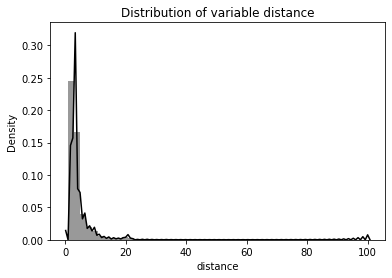

In [109]:
#Outliers in Distance
sns.distplot(test['distance'],color='black')
plt.title("Distribution of variable distance")
plt.ylabel("Density")
plt.show()


In [110]:
#Right skewed, Let's remove skewness using log function

test['distance'] = np.log(test['distance'])


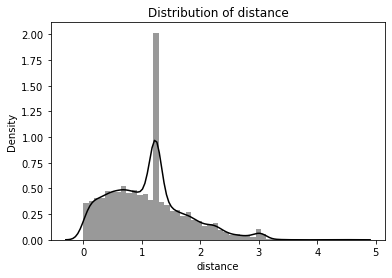

In [111]:
#Data after log transformation
sns.distplot(test['distance'],color='black')
plt.title("Distribution of distance")
plt.ylabel("Density")
plt.show()

In [112]:
#Let's apply Random Forest model
Final_model = model2.predict(test)

In [113]:
#Dependent variable
test['Predicted_Fare_Amount'] = Final_model


In [114]:
test.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,hour,distance,Predicted_Fare_Amount
0,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,13,0.842971,9.71960
1,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,13,0.885977,10.03820
2,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,11,1.234125,10.55294
3,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,21,0.673471,8.81400
4,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,21,1.684045,16.12480
